---
title: Pandasの使い方
subject: pandasの使い方
keywords: [python, pandas]
authors:
  - Shota Takahashi
exports:
  - format: pdf  
---

In [4]:
import random
import pandas as pd
import numpy as np

print(pd.__version__)


2.2.1


# 乱数を使ったサンプルデータしたい

- ``x``: ガウス分布
- ``y``: `(4, 8)`の一様分布
- ``y``: `(0, 10)`の整数の一様分布

## リスト型リストを変換したい

- リスト型リスト（``list[list]``）、タプル型リスト（``list[tuple]``）、リスト型タプル（``tuple[list]``）、タプル型タプル（``tuple[tuple]``）をデータフレームに変換します
- ``columns``オプションを使ってカラム名を変更できます

In [6]:
samples = [
    (random.gauss(), random.uniform(4, 8), random.randint(0, 10)) for i in range(1000)
]
data = pd.DataFrame(samples, columns=["x", "y", "z"])
data


,x,y,z
0,-0.938887,7.111148,1
1,0.715837,4.533501,8
2,-0.275495,6.053864,6
3,0.355256,4.252114,5
4,-1.431450,6.111499,5
...,...,...,...
995,-0.709655,6.503711,1
996,-0.179977,4.506143,3
997,1.657449,6.807694,1
998,-0.059002,6.342267,2


## 辞書型リストを変換したい

- 辞書型リスト（``list[dict[str, Any]]``）、辞書型タプル（``tuple[dict[str, Any]]``）をデータフレームに変換できます
- 辞書のキーがカラム名になります

In [3]:
samples = (
    {"x": random.gauss(), "y": random.uniform(4, 8), "z": random.randint(10, 10)}
    for i in range(1000)
)
data = pd.DataFrame(samples)
data


,x,y,z
0,-1.657099,7.373900,10
1,-1.490112,6.016743,10
2,-0.830145,6.991298,10
3,-0.485093,7.390934,10
4,-0.548951,7.998811,10
...,...,...,...
995,-0.646643,5.879881,10
996,1.231806,4.075108,10
997,0.617115,6.099336,10
998,0.644732,7.022094,10


# 年齢分布を作成

18 - 60歳の100人を対象に実施したアンケートの、年齢分布を作成したいと思います。

In [55]:
ages = [random.randint(18, 60) for i in range(100)]
ages = pd.DataFrame({"age": ages})


`pd.DataFrame.hist`でビニングを指定して、ヒストグラムを描画できます。

<Axes: ylabel='Frequency'>

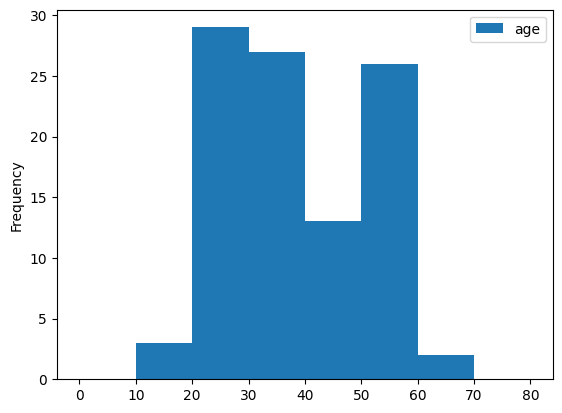

In [56]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
ages.plot.hist(bins=bins)


しかし、これではそれぞれの階級（ビン）の度数（頻度）がわかりません。

階級と頻度を取得するには``np.histogram``を使います。
任意のビニングを指定すると、その度数（``freq``）と階級（``ages``）を取得できます。
連続的なデータを一括でビニングできるので大変便利です。

In [57]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
freq, age = np.histogram(ages, bins=bins)


<Axes: xlabel='age'>

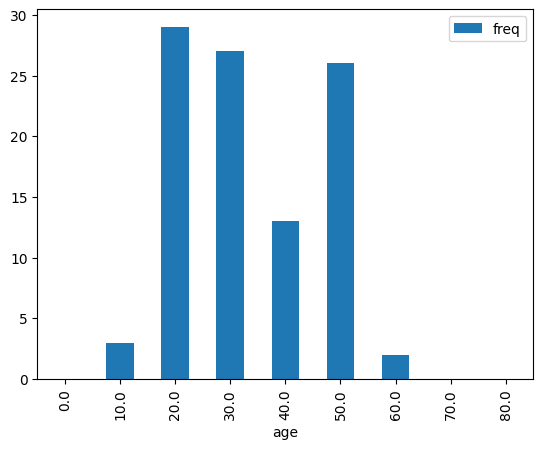

In [58]:
data = pd.DataFrame(data=[age, freq], index=["age", "freq"]).T
data.plot.bar(x="age", y="freq")


In [75]:
pd.cut(age, bins=10, retbins=True)


tuple